# Peak Detection
This notebook is made for detecting peaks of the snippets extracted in module 2 using the function defined in "3.0 - Functions_peakdetection.ipynb".

Checkout list:
- Going trough all the snippets stored in the data based.
- Applying the peak detection algorithm.
- Storing the detected peaks in a new data file inside the same snippet folder.

In [53]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import pyarrow.feather as feather

from tqdm import tqdm

from misc.render import *
from misc.synthetic_noise import *
from misc.noise_filtering import *
from misc.peakdetection import *

In [41]:
#cwd = os.getcwd() # Current Directory
#database_root = os.path.join(cwd,'Databases','Database1') #For Matthieu

#root = 'G:\My Drive\Molecool\Databases\Database1'
database_root = '/Volumes/GoogleDrive/.shortcut-targets-by-id/1sZgDE1M3o-bDINfAQYEXl_vqsKs03WxD/Molecool/Databases/Database1' # Jaume's directory

In [42]:
def write_peaks(path,rate):
    """Function to open snippet files, get peaks, and write them to a new file"""
    df = pd.read_feather(os.path.join(path,'MSNIP.ftr'))
    df_peaks = filtering_det(df['ecg_0'],rate)
    feather.write_feather(df_peaks, os.path.join(path,'PEAKS.ftr'))

In [43]:
def write_meta(path):
    """Function that creates a new meta file for peak files"""
    data = {'Error Flag': False, 'Error Type': 'No error'}
    with open(os.path.join(path,'PeakMeta.json'), "w") as outfile:
        json.dump(data, outfile)
        outfile.close()

In [44]:
def find_rate(path):
    """Function which check the meta json file to see the sampling frequency of the original signal"""
    with open(path + '/Meta.json') as json_file:
        metaData = json.load(json_file)
        json_file.close() # Not needed  when you use context
        return int(metaData['Sampling rate'])

In [45]:
raw_patients = sorted(os.listdir(database_root))

patients = [patient for patient in raw_patients if not patient.endswith(('.json', 'ini','\r'))]
patients = [patient for patient in raw_patients if os.path.isdir(os.path.join(database_root,patient))]
patients_with_holter = [patient for patient in patients if os.path.isdir(os.path.join(database_root,patient,'holter'))]

# Now we need to check the holter folder contains some snippets ---------------------------------------------
# Helper functions (can be offloaded to another file) -------------------------------------------------------


def is_valid_snippet(snippet):
    # We still need to check the expected files are in the folder
    MSNIP.ftr
    
    return True


def has_snippets(path):
    dirs = [a_dir for a_dir in sorted(os.listdir(path)) if os.path.isdir(os.path.join(path,a_dir))]
    snippet_dirs = [a_dir for a_dir in dirs if a_dir.startswith('Snippet')]

    return len(snippet_dirs)>0


def all_snippets(path):
    dirs = [a_dir for a_dir in sorted(os.listdir(path)) if os.path.isdir(os.path.join(path,a_dir))]
    # now we check they are snippet dirs
    snippet_dirs = [a_dir for a_dir in dirs if a_dir.startswith('Snippet')]
    # valid_snippet_dirs = [a_dir for a_dir in snippet_dirs if is_valid_snippet(os.path.join(path,a_dir))]
    return snippet_dirs


# -----------------------------------------------------------------------------------------------------------
    
patients_with_snippets = [patient for patient in patients_with_holter 
                          if has_snippets(os.path.join(database_root,patient,'holter'))]

print(patients_with_snippets)
# Now we have the patient folders with snippets and we know where they are !
# So the loop will be clean

['S0250', 'S0256', 'S0273', 'S0282', 'S0283', 'S0287', 'S0288', 'S0292', 'S0296', 'S0300', 'S0301', 'S0304', 'S0308', 'S0310', 'S0312', 'S0314', 'S0315', 'S0316', 'S0317', 'S0318', 'S0326', 'S0342', 'S0349', 'S0365', 'S0366', 'S0368', 'S0372', 'S0381', 'S0382', 'S0390', 'S0392', 'S0398', 'S0403', 'S0405', 'S0406', 'S0409', 'S0416', 'S0420', 'S0423', 'S0424', 'S0426', 'S0427', 'S0430', 'S0432', 'S0433', 'S0434', 'S0435', 'S0441']


In [46]:
for patient in tqdm(patients_with_snippets): #Looping throught the folders Sxxxx with snippets
    patient_path = os.path.join(database_root,patient)
    holter_path = os.path.join(patient_path,'holter')
    samplingRate = find_rate(holter_path)
    all_patient_snippets = all_snippets(holter_path)
    all_snippets_path = [os.path.join(holter_path,snippet) for snippet in all_patient_snippets]

    
    print(patient)
    for path_snippet in all_snippets_path:
        write_meta(path_snippet)
        try:
            write_peaks(path_snippet, samplingRate)
        except:
            print("Patient holter file not found, not present in the database.") 

  0%|                                                    | 0/48 [00:00<?, ?it/s]

S0250


  2%|▉                                           | 1/48 [00:01<01:25,  1.82s/it]

S0256


  4%|█▊                                          | 2/48 [00:02<00:47,  1.03s/it]

S0273


  6%|██▊                                         | 3/48 [00:04<01:09,  1.55s/it]

S0282


  8%|███▋                                        | 4/48 [00:05<01:01,  1.41s/it]

S0283


 10%|████▌                                       | 5/48 [00:07<01:12,  1.69s/it]

S0287


 12%|█████▌                                      | 6/48 [00:09<01:10,  1.68s/it]

S0288


 15%|██████▍                                     | 7/48 [00:10<01:04,  1.57s/it]

S0292


 17%|███████▎                                    | 8/48 [00:11<00:55,  1.39s/it]

S0296


 19%|████████▎                                   | 9/48 [00:13<00:55,  1.43s/it]

S0300


 21%|████████▉                                  | 10/48 [00:15<01:01,  1.62s/it]

S0301


 23%|█████████▊                                 | 11/48 [00:17<01:05,  1.76s/it]

S0304


 25%|██████████▊                                | 12/48 [00:18<00:55,  1.55s/it]

S0308


 27%|███████████▋                               | 13/48 [00:19<00:47,  1.34s/it]

S0310


 29%|████████████▌                              | 14/48 [00:24<01:28,  2.61s/it]

S0312


 31%|█████████████▍                             | 15/48 [00:25<01:05,  1.99s/it]

S0314


 33%|██████████████▎                            | 16/48 [00:26<00:53,  1.68s/it]

S0315


 35%|███████████████▏                           | 17/48 [00:26<00:41,  1.32s/it]

S0316


 38%|████████████████▏                          | 18/48 [00:29<00:53,  1.80s/it]

S0317


 40%|█████████████████                          | 19/48 [00:32<01:00,  2.09s/it]

S0318


 42%|█████████████████▉                         | 20/48 [00:34<00:57,  2.07s/it]

S0326


 44%|██████████████████▊                        | 21/48 [00:36<00:51,  1.92s/it]

S0342


 46%|███████████████████▋                       | 22/48 [00:37<00:44,  1.71s/it]

S0349


 48%|████████████████████▌                      | 23/48 [00:38<00:34,  1.39s/it]

S0365


 50%|█████████████████████▌                     | 24/48 [00:39<00:36,  1.53s/it]

S0366


 52%|██████████████████████▍                    | 25/48 [00:42<00:41,  1.78s/it]

S0368


 54%|███████████████████████▎                   | 26/48 [00:43<00:38,  1.73s/it]

S0372


 56%|████████████████████████▏                  | 27/48 [00:45<00:36,  1.75s/it]

S0381


 58%|█████████████████████████                  | 28/48 [00:47<00:35,  1.77s/it]

S0382


 60%|█████████████████████████▉                 | 29/48 [00:48<00:26,  1.39s/it]

S0390


 62%|██████████████████████████▉                | 30/48 [00:49<00:26,  1.48s/it]

S0392


 65%|███████████████████████████▊               | 31/48 [00:51<00:25,  1.53s/it]

S0398


 67%|████████████████████████████▋              | 32/48 [00:52<00:21,  1.36s/it]

S0403


 69%|█████████████████████████████▌             | 33/48 [00:54<00:26,  1.74s/it]

S0405


 71%|██████████████████████████████▍            | 34/48 [00:57<00:26,  1.92s/it]

S0406
Patient holter file not found, not present in the database.


 73%|███████████████████████████████▎           | 35/48 [00:58<00:23,  1.80s/it]

S0409


 75%|████████████████████████████████▎          | 36/48 [00:59<00:17,  1.43s/it]

S0416


 77%|█████████████████████████████████▏         | 37/48 [01:01<00:19,  1.77s/it]

S0420


 79%|██████████████████████████████████         | 38/48 [01:04<00:20,  2.08s/it]

S0423


 81%|██████████████████████████████████▉        | 39/48 [01:07<00:20,  2.29s/it]

S0424


 83%|███████████████████████████████████▊       | 40/48 [01:08<00:15,  1.96s/it]

S0426


 85%|████████████████████████████████████▋      | 41/48 [01:10<00:14,  2.04s/it]

S0427


 88%|█████████████████████████████████████▋     | 42/48 [01:13<00:12,  2.11s/it]

S0430


 90%|██████████████████████████████████████▌    | 43/48 [01:15<00:10,  2.14s/it]

S0432


 92%|███████████████████████████████████████▍   | 44/48 [01:19<00:10,  2.73s/it]

S0433


 94%|████████████████████████████████████████▎  | 45/48 [01:21<00:07,  2.63s/it]

S0434


 96%|█████████████████████████████████████████▏ | 46/48 [01:24<00:05,  2.59s/it]

S0435


 98%|██████████████████████████████████████████ | 47/48 [01:27<00:02,  2.65s/it]

S0441


100%|███████████████████████████████████████████| 48/48 [01:30<00:00,  1.88s/it]


  0%|                                                    | 0/48 [00:00<?, ?it/s]

S0250


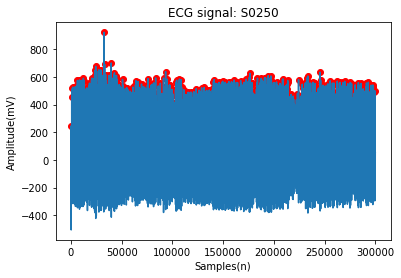

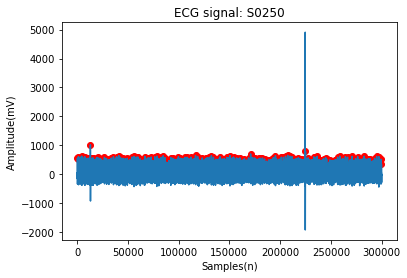

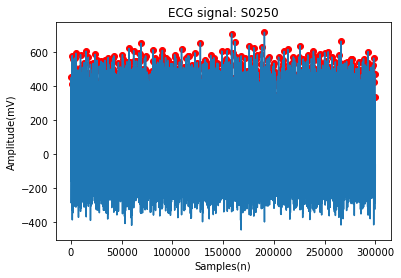

  2%|▉                                           | 1/48 [00:00<00:44,  1.05it/s]

S0256


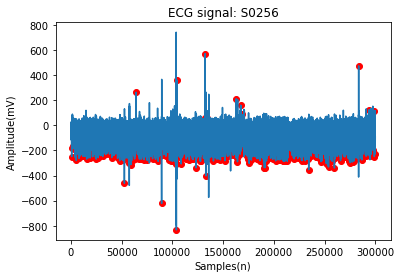

  4%|█▊                                          | 2/48 [00:01<00:26,  1.77it/s]

S0273


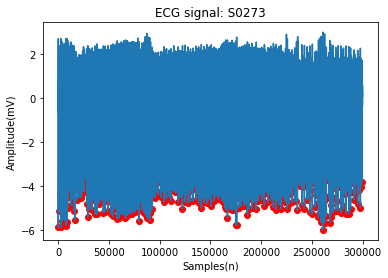

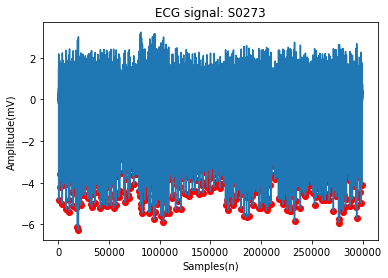

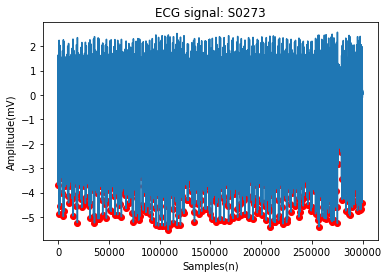

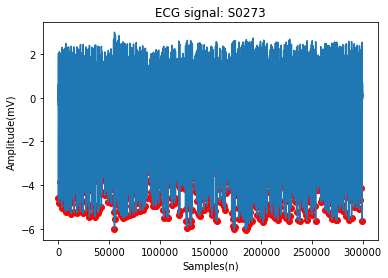

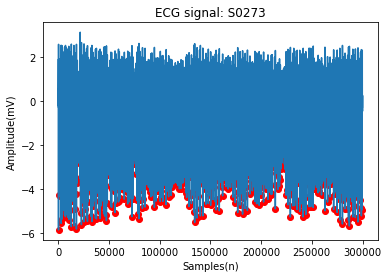

  6%|██▊                                         | 3/48 [00:02<00:42,  1.06it/s]

S0282


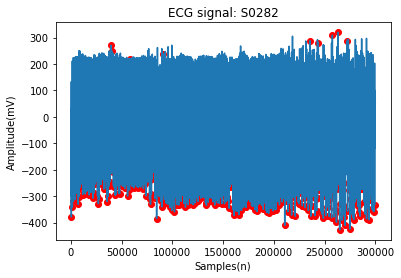

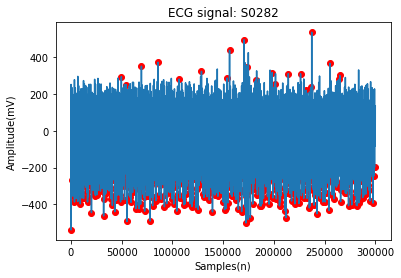

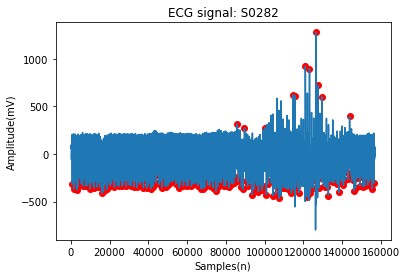

  8%|███▋                                        | 4/48 [00:03<00:39,  1.11it/s]

S0283


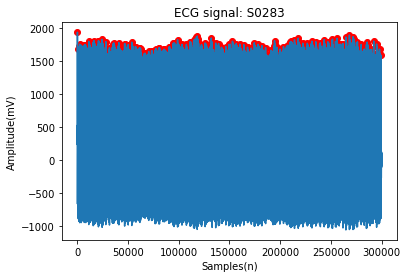

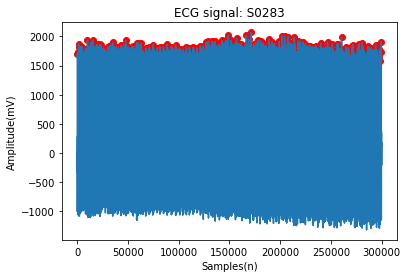

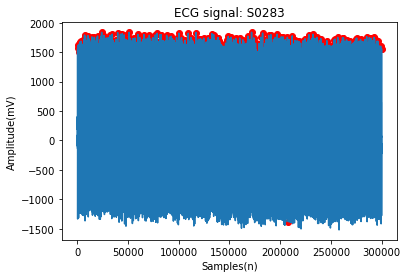

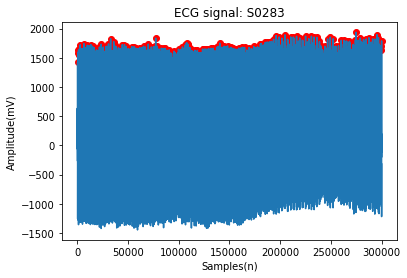

 10%|████▌                                       | 5/48 [00:04<00:44,  1.04s/it]

S0287


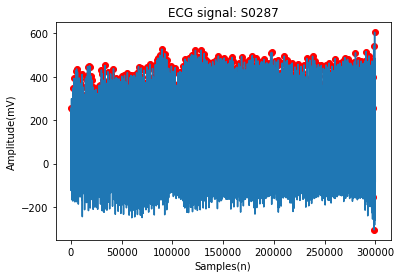

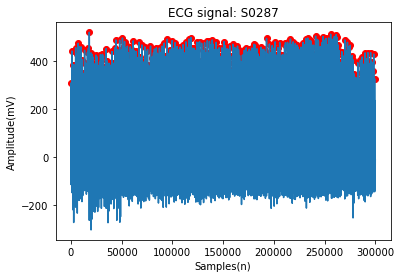

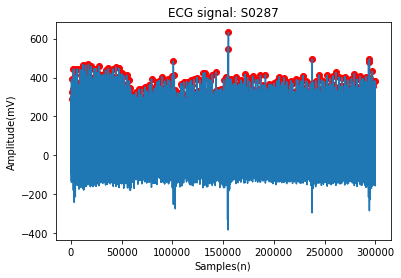

 12%|█████▌                                      | 6/48 [00:05<00:44,  1.05s/it]

S0288


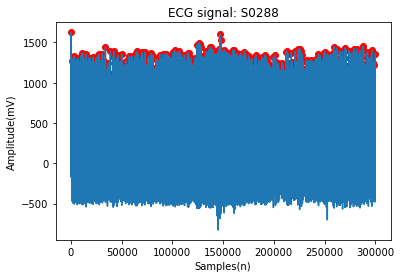

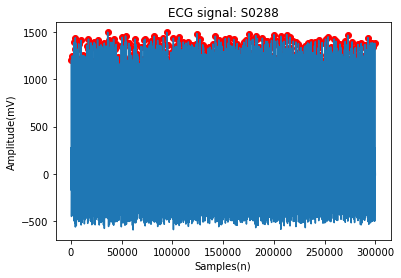

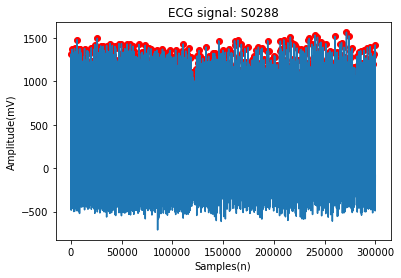

 15%|██████▍                                     | 7/48 [00:06<00:40,  1.01it/s]

S0292


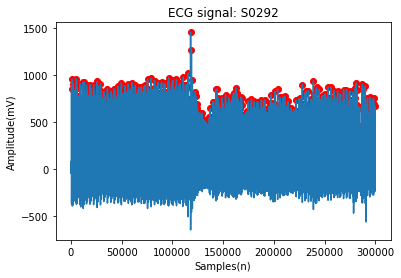

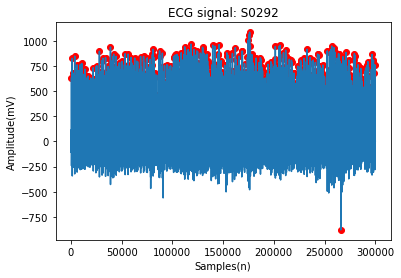

 17%|███████▎                                    | 8/48 [00:07<00:34,  1.15it/s]

S0296


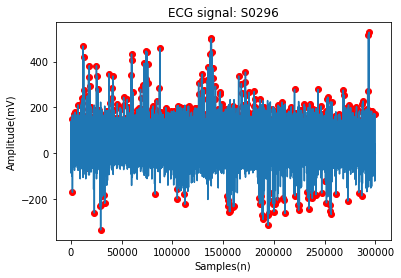

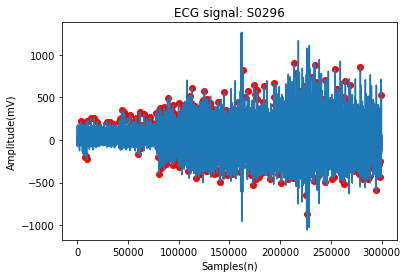

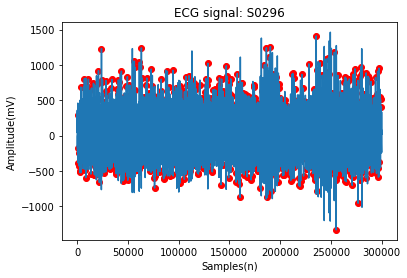

 19%|████████▎                                   | 9/48 [00:08<00:35,  1.10it/s]

S0300


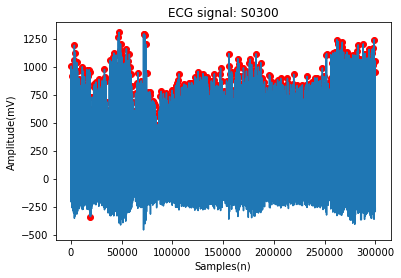

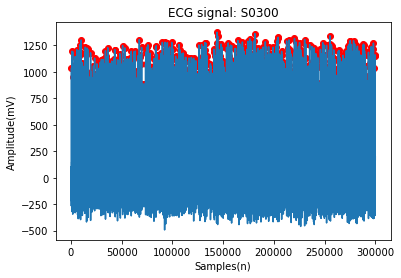

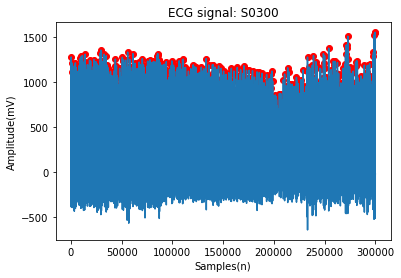

 21%|████████▉                                  | 10/48 [00:09<00:35,  1.06it/s]

S0301


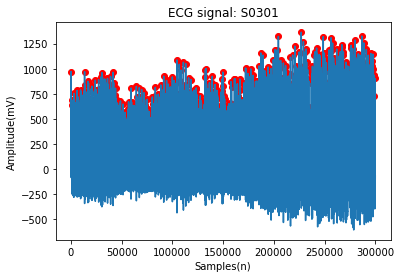

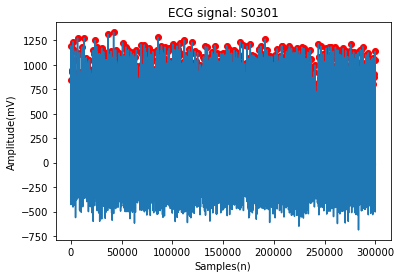

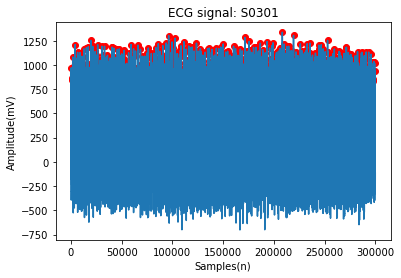

 23%|█████████▊                                 | 11/48 [00:10<00:36,  1.01it/s]

S0304


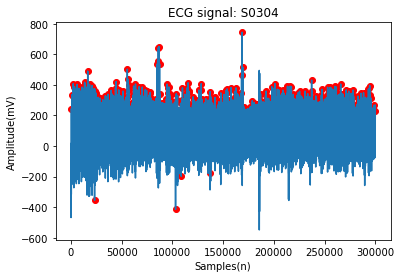

 25%|██████████▊                                | 12/48 [00:10<00:28,  1.28it/s]

S0308


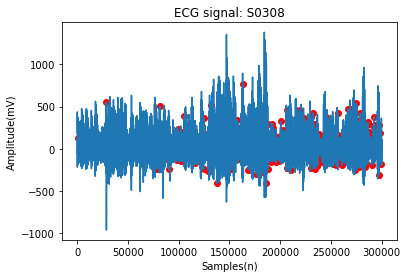

 27%|███████████▋                               | 13/48 [00:11<00:22,  1.59it/s]

S0310


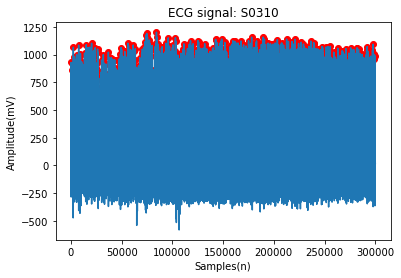

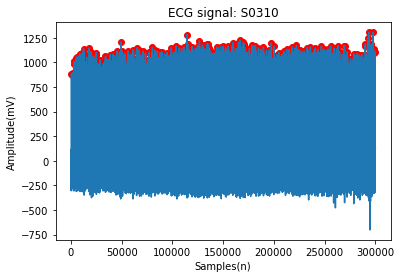

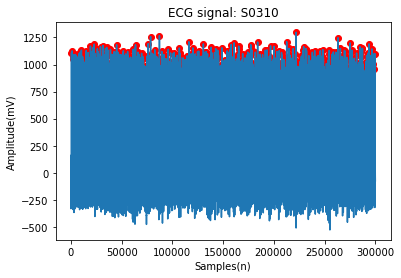

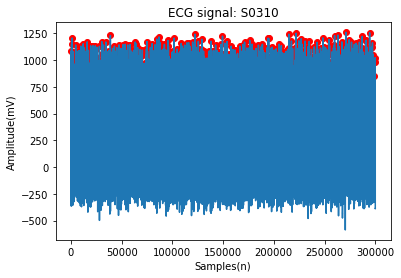

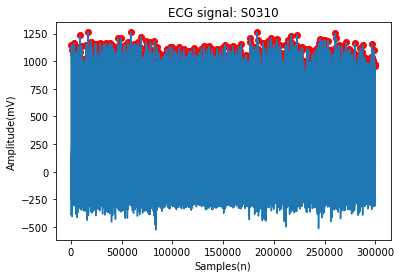

 29%|████████████▌                              | 14/48 [00:12<00:28,  1.18it/s]

S0312


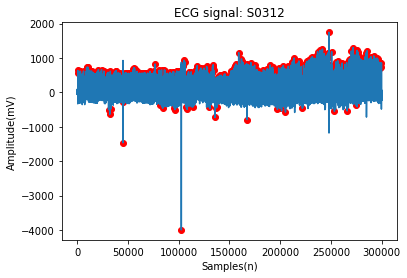

 31%|█████████████▍                             | 15/48 [00:12<00:21,  1.50it/s]

S0314


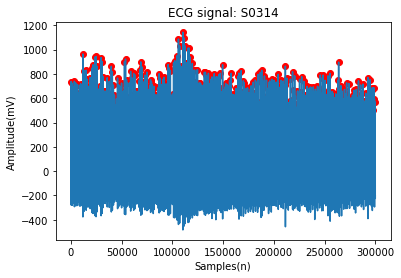

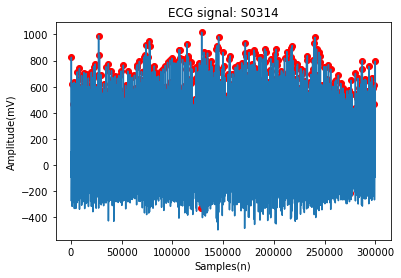

 33%|██████████████▎                            | 16/48 [00:13<00:20,  1.59it/s]

S0315


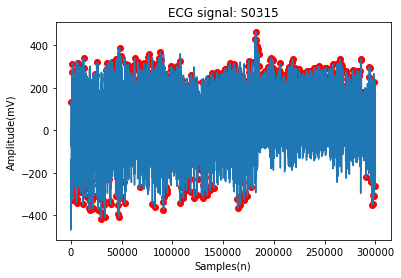

 35%|███████████████▏                           | 17/48 [00:13<00:16,  1.86it/s]

S0316


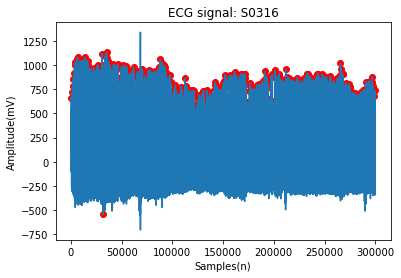

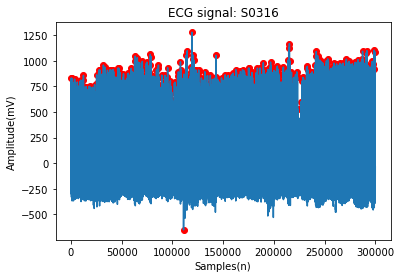

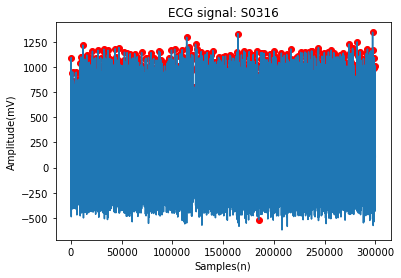

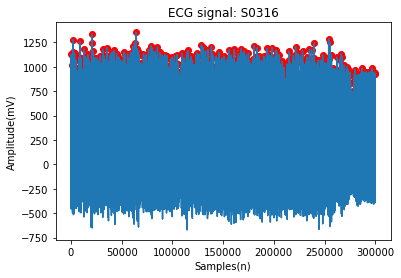

 38%|████████████████▏                          | 18/48 [00:14<00:24,  1.24it/s]

S0317


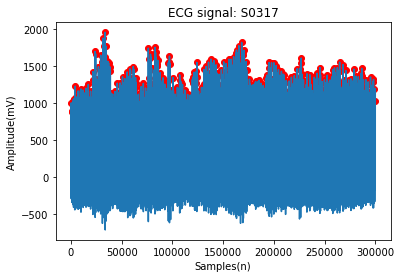

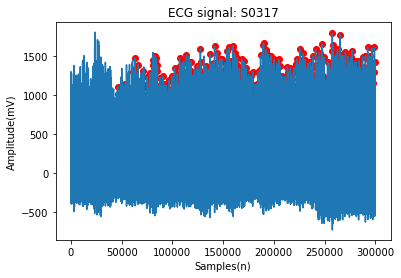

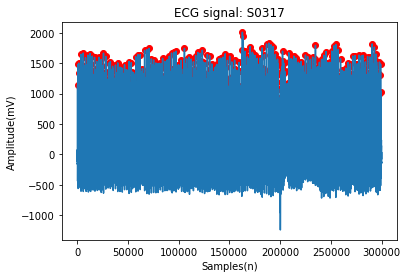

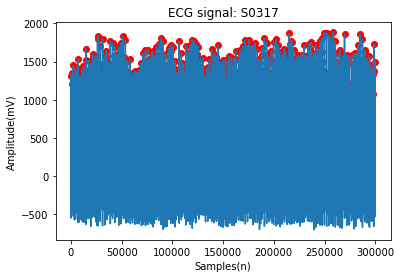

 40%|█████████████████                          | 19/48 [00:16<00:26,  1.11it/s]

S0318


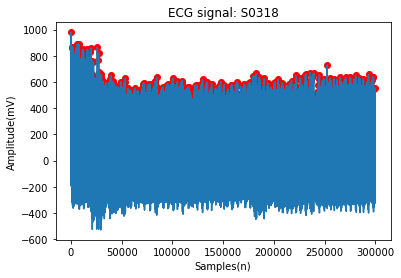

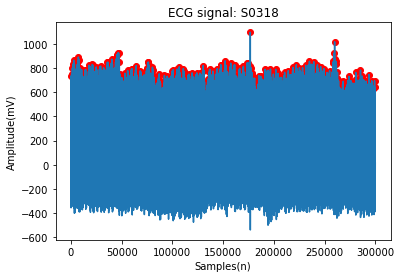

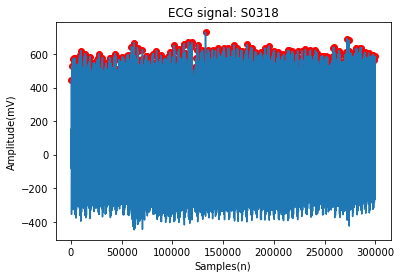

 42%|█████████████████▉                         | 20/48 [00:17<00:27,  1.03it/s]

S0326


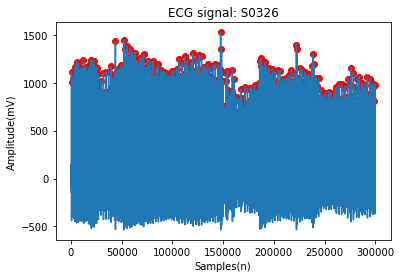

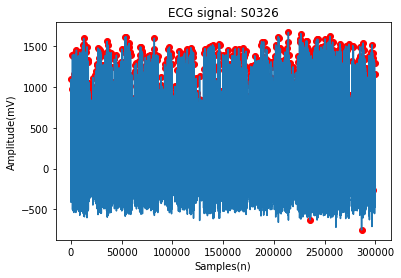

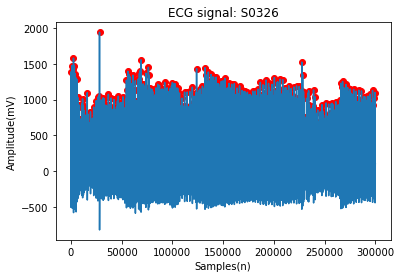

 44%|██████████████████▊                        | 21/48 [00:18<00:25,  1.07it/s]

S0342


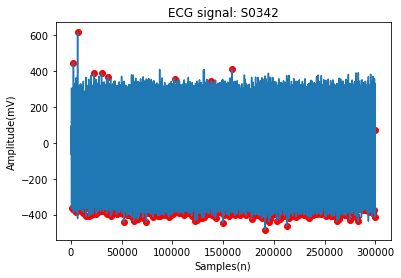

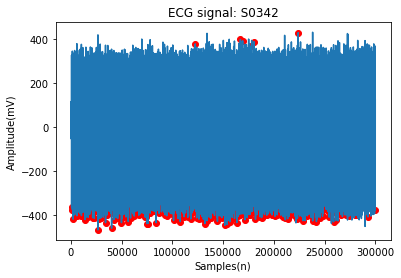

 46%|███████████████████▋                       | 22/48 [00:18<00:22,  1.15it/s]

S0349


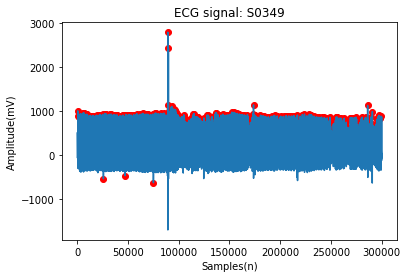

 48%|████████████████████▌                      | 23/48 [00:18<00:16,  1.48it/s]

S0365


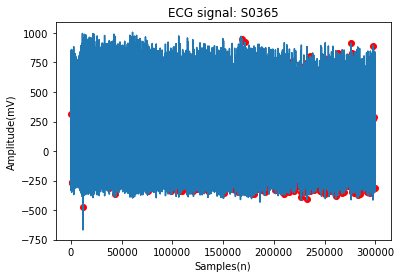

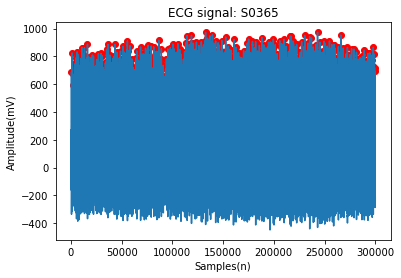

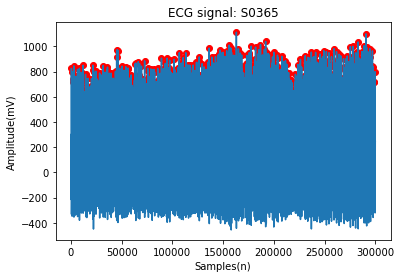

 50%|█████████████████████▌                     | 24/48 [00:19<00:17,  1.41it/s]

S0366


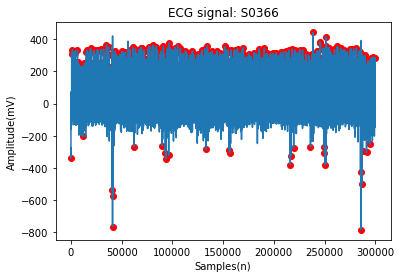

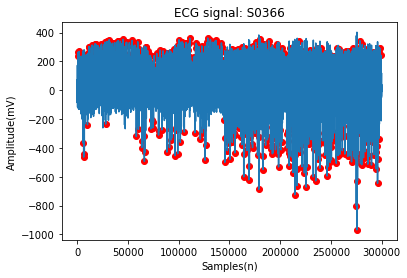

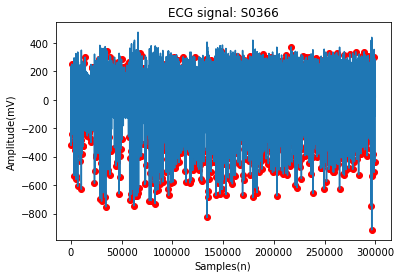

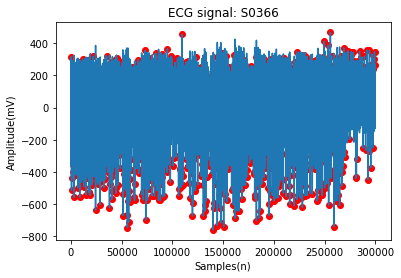

 52%|██████████████████████▍                    | 25/48 [00:20<00:18,  1.27it/s]

S0368


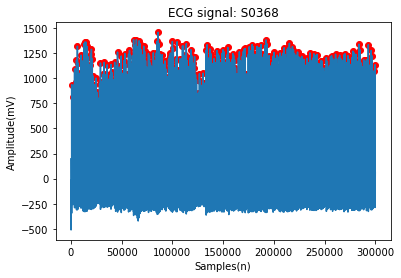

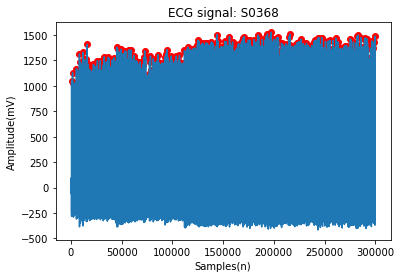

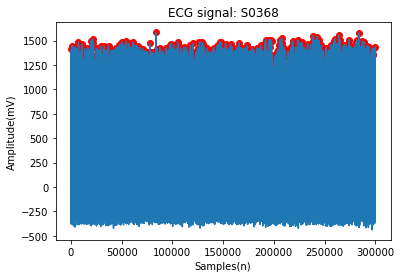

 54%|███████████████████████▎                   | 26/48 [00:21<00:17,  1.29it/s]

S0372


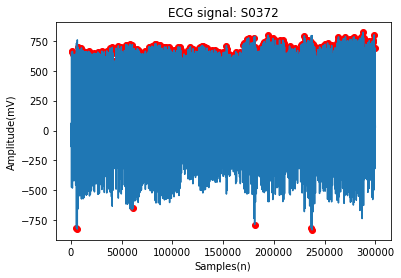

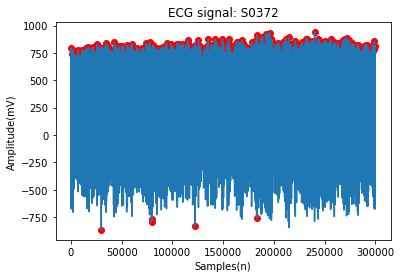

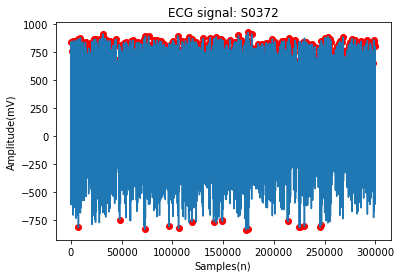

 56%|████████████████████████▏                  | 27/48 [00:22<00:17,  1.23it/s]

S0381


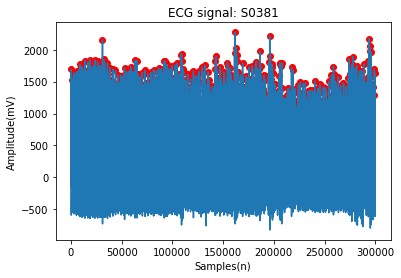

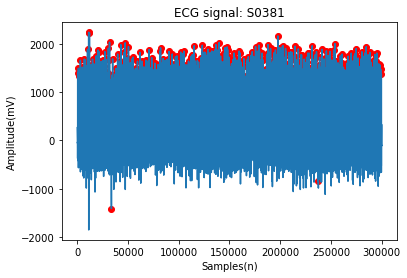

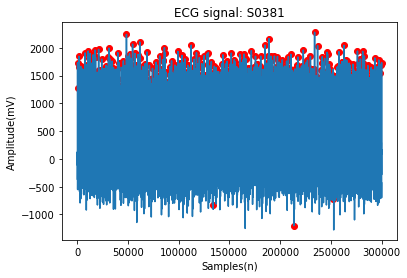

 58%|█████████████████████████                  | 28/48 [00:23<00:15,  1.27it/s]

S0382


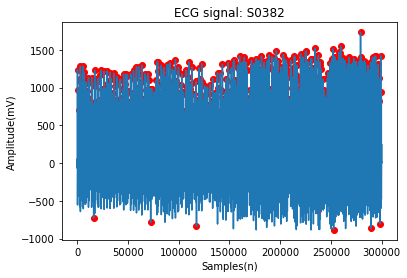

 60%|█████████████████████████▉                 | 29/48 [00:23<00:12,  1.58it/s]

S0390


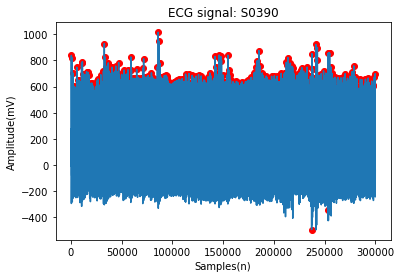

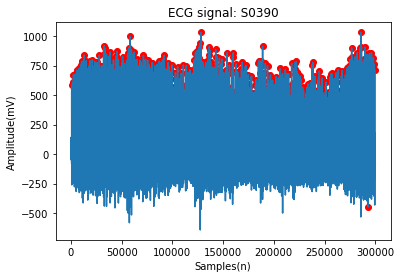

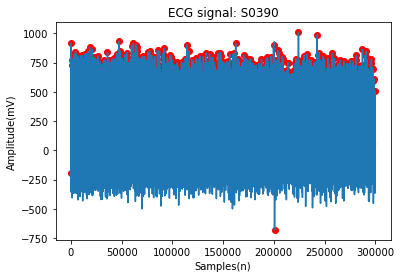

 62%|██████████████████████████▉                | 30/48 [00:24<00:12,  1.47it/s]

S0392


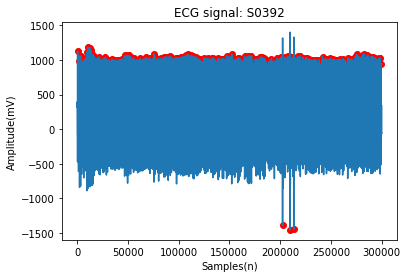

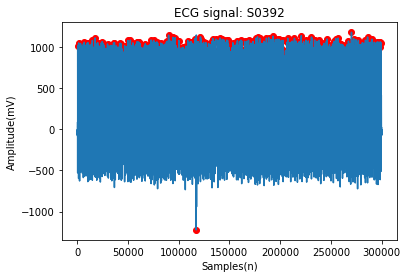

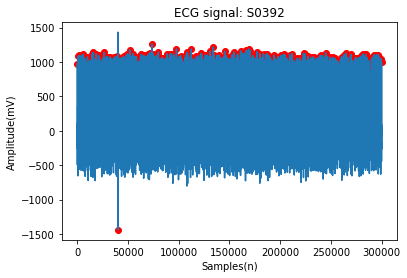

 65%|███████████████████████████▊               | 31/48 [00:24<00:11,  1.42it/s]

S0398


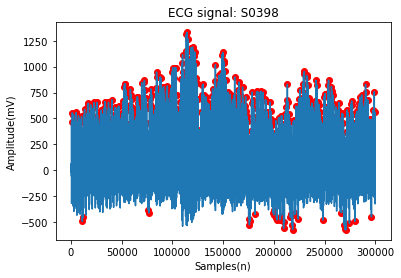

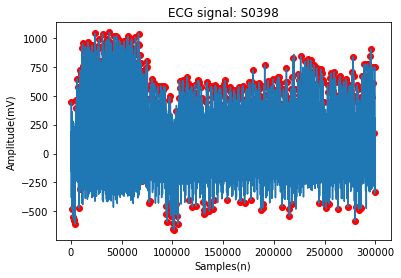

 67%|████████████████████████████▋              | 32/48 [00:25<00:10,  1.56it/s]

S0403


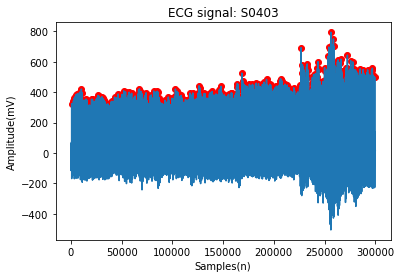

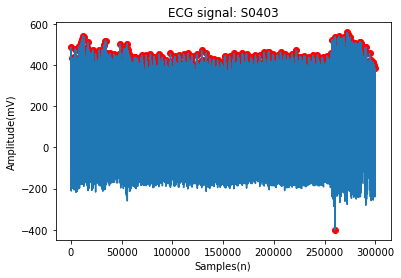

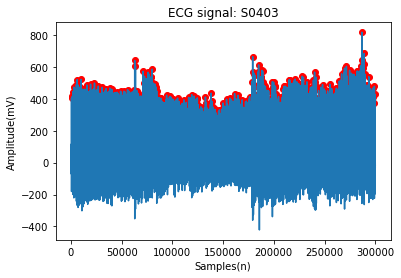

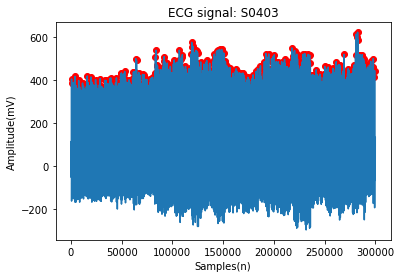

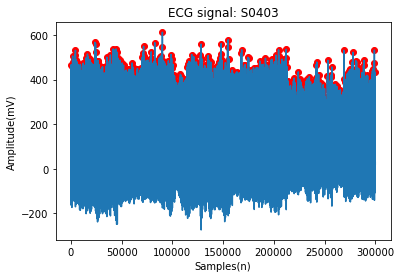

 69%|█████████████████████████████▌             | 33/48 [00:26<00:13,  1.11it/s]

S0405


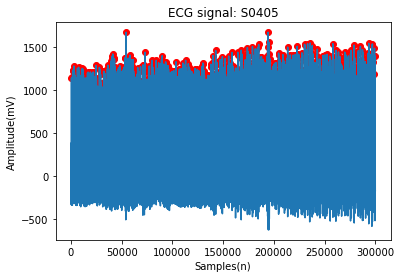

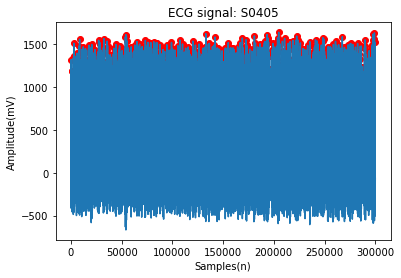

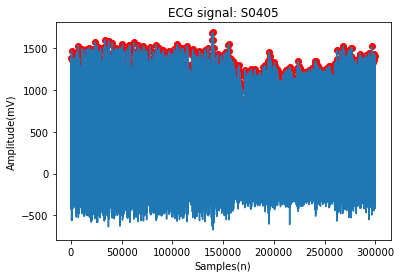

 71%|██████████████████████████████▍            | 34/48 [00:27<00:12,  1.10it/s]

S0406


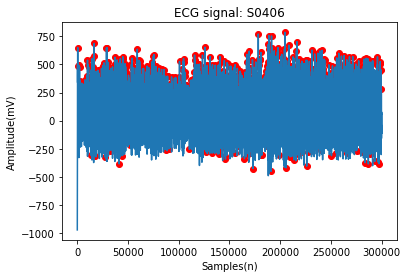

 71%|██████████████████████████████▍            | 34/48 [00:28<00:11,  1.21it/s]


ArrowInvalid: Not an Arrow file

In [51]:
# Check to see the state of the peaks
for patient in tqdm(patients_with_snippets): #Looping throught the folders Sxxxx with snippets
    patient_path = os.path.join(database_root,patient)
    holter_path = os.path.join(patient_path,'holter')
    samplingRate = find_rate(holter_path)
    all_patient_snippets = all_snippets(holter_path)
    all_snippets_path = [os.path.join(holter_path,snippet) for snippet in all_patient_snippets]

    
    print(patient)
    try:
        for path_snippet in all_snippets_path:
            df = pd.read_feather(path_snippet + '/MSNIP.ftr')
            df_signal = df['ecg_0']
            df_peaks = pd.read_feather(path_snippet + '/PEAKS.ftr')
            plt.plot(df_signal)
            plt.title('ECG signal: ' + patient)
            plt.xlabel('Samples(n)')
            plt.ylabel('Amplitude(mV)')
            plt.scatter(df_peaks['x_values'],df_peaks['y_values'], marker='o',c='red')
            plt.show()
        except:
            print("No holter foder found - moving to the next Snippet.")
        